<a href="https://colab.research.google.com/github/JeswinMS4/EDA_on_Titatic_Spaceship_Dataset/blob/main/Titanic_Spaceship_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This is a basic analysis on Titanic Spaceship Dataset


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

##Downloading the dataset and unzipping it


In [ ]:
!kaggle competitions download -c spaceship-titanic

100% 299k/299k [00:00<00:00, 867kB/s]
100% 299k/299k [00:00<00:00, 867kB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#Importing all the required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import csv

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 81.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f120e1f2a8de80080713ed98aad999b9c0321298834e571e958e44638bb48d55
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.3.0
    Uninstalling pydantic-2

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-4-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


###Loading the CSV file into a dataframe

In [ ]:
df= pd.read_csv('SIH_DATASET_999.csv')

###Using Pandas Profiling to get the information regarding the data

In [ ]:
report=ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###Dropping High Cardinality columns

In [ ]:
df_train=df.copy()
df_train.drop(columns=['PassengerId','Name'], inplace=True)

In [ ]:
df_train['PassengerId']=df['PassengerId']

In [ ]:
df_train.head()

HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported PassengerId  
0        0.0           0.0     0.0     0.0        False     0001_01  
1        9.0          25.0   549.0    44.0         True     0002_01  
2     3576.0           0.0  6715.0    49.0        False     0003_01  
3     1283.0         371.0  3329.0   193.0        False     0003_02  
4       70.0         151.0   565.0     2.0         True     0004_01

In [ ]:
df_train[['Group Id','Person Id']]=df_train['PassengerId'].str.split('_', expand=True)

In [ ]:
df_train.head()

HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  \
0        0.0           0.0     0.0     0.0        False    B         0    P   
1        9.0          25.0   549.0    44.0         True    F         0    S   
2     3576.0           0.0  6715.0    49.0        False    A         0    S   
3     1283.0         371.0  3329.0   193.0        False    A         0    S   
4       70.0         151.0   565.0     2.0         True    F         1    S   

  PassengerId Group Id Person Id  
0     0001_01     0001        01  
1     0002_01     0002        01  
2     0003_01     0003        01  
3     0003_02     0003        02  
4     0004_01     0004        01

In [ ]:
df_train[["Deck","Cabin_num","Side"]]=df_train["Cabin"].str.split("/", expand=True)

In [ ]:
df_train.drop(columns="Cabin", inplace=True)

In [ ]:
df_train

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0        Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2        Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3        Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4         Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
...         ...       ...            ...   ...    ...          ...        ...   
8688     Europa     False    55 Cancri e  41.0   True          0.0     6819.0   
8689      Earth      True  PSO J318.5-22  18.0  False          0.0        0.0   
8690      Earth     False    TRAPPIST-1e  26.0  False          0.0        0.0   
8691     Europa     False    55 Cancri e  32.0  False          0.0     1049.0   
8692     Europa     False    TRAPPIST-1e  44.0  False        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  \
0              0.0     0.0     0.0        False    B         0    P   
1             25.0   549.0    44.0         True    F         0    S   
2              0.0  6715.0    49.0        False    A         0    S   
3            371.0  3329.0   193.0        False    A         0    S   
4            151.0   565.0     2.0         True    F         1    S   
...            ...     ...     ...          ...  ...       ...  ...   
8688           0.0  1643.0    74.0        False    A        98    P   
8689           0.0     0.0     0.0        False    G      1499    S   
8690        1872.0     1.0     0.0         True    G      1500    S   
8691           0.0   353.0  3235.0        False    E       608    S   
8692           0.0     0.0    12.0         True    E       608    S   

     PassengerId Group Id Person Id  
0        0001_01     0001        01  
1        0002_01     0002        01  
2        0003_01     0003        01  
3        0003_02     0003        02  
4        0004_01     0004        01  
...          ...      ...       ...  
8688     9276_01     9276        01  
8689     9278_01     9278        01  
8690     9279_01     9279        01  
8691     9280_01     9280        01  
8692     9280_02     9280        02  

[8693 rows x 17 columns]

In [ ]:
df_train.drop(columns='PassengerId',inplace=True)

<Axes: >

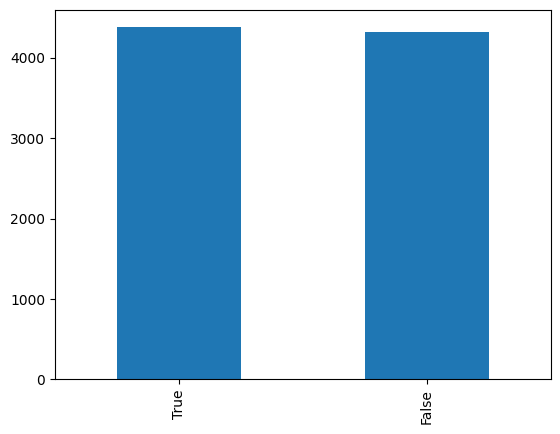

In [ ]:
plot_df = df_train.Transported.value_counts()
plot_df.plot(kind="bar")

In [ ]:
df_train.drop(columns=['Group Id','Person Id'],inplace=True)

In [ ]:
df_train.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  
0           0.0     0.0     0.0        False    B         0    P  
1          25.0   549.0    44.0         True    F         0    S  
2           0.0  6715.0    49.0        False    A         0    S  
3         371.0  3329.0   193.0        False    A         0    S  
4         151.0   565.0     2.0         True    F         1    S

###Checking for Null Values

In [ ]:
df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df_train.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Deck            199
Cabin_num       199
Side            199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [ ]:
df_train['VIP'] = df_train['VIP'].astype(int)
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)

In [ ]:

df_train['Transported'] = df_train['Transported'].astype(int)

In [ ]:
df_train['Cabin_num']=df_train['Cabin_num'].astype(int)

In [ ]:
df_train.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa          0  TRAPPIST-1e  39.0    0          0.0        0.0   
1      Earth          0  TRAPPIST-1e  24.0    0        109.0        9.0   
2     Europa          0  TRAPPIST-1e  58.0    1         43.0     3576.0   
3     Europa          0  TRAPPIST-1e  33.0    0          0.0     1283.0   
4      Earth          0  TRAPPIST-1e  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck  Cabin_num Side  
0           0.0     0.0     0.0            0    B          0    P  
1          25.0   549.0    44.0            1    F          0    S  
2           0.0  6715.0    49.0            0    A          0    S  
3         371.0  3329.0   193.0            0    A          0    S  
4         151.0   565.0     2.0            1    F          1    S

In [ ]:
!nvidia-smi

Tue May 23 16:43:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df_train.head(10)

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
5      Earth     False  PSO J318.5-22  44.0  False          0.0      483.0   
6      Earth     False    TRAPPIST-1e  26.0  False         42.0     1539.0   
7      Earth      True    TRAPPIST-1e  28.0  False          0.0        0.0   
8      Earth     False    TRAPPIST-1e  35.0  False          0.0      785.0   
9     Europa      True    55 Cancri e  14.0  False          0.0        0.0   

   ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  
0           0.0     0.0     0.0        False    B         0    P  
1          25.0   549.0    44.0         True    F         0    S  
2           0.0  6715.0    49.0        False    A         0    S  
3         371.0  3329.0   193.0        False    A         0    S  
4         151.0   565.0     2.0         True    F         1    S  
5           0.0   291.0     0.0         True    F         0    P  
6           3.0     0.0     0.0         True    F         2    S  
7           0.0     0.0     NaN         True    G         0    S  
8          17.0   216.0     0.0         True    F         3    S  
9           0.0     0.0     0.0         True    B         1    P

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   object 
 12  Cabin_num     8693 non-null   int64  
 13  Side          8693 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 950.9+ KB


In [ ]:
categorical_variables=df_train.select_dtypes(include=['object']).columns
for col in categorical_variables:
  print(col)

HomePlanet
CryoSleep
Destination
VIP
Cabin


In [ ]:
df_train["Cabin"]=df_train["Deck"]+'/'+df_train["Cabin_num"]+'/'+df_train["Side"]

In [ ]:
df_train

HomePlanet  CryoSleep    Destination   Age  VIP  RoomService  FoodCourt  \
0        Europa          0    TRAPPIST-1e  39.0    0          0.0        0.0   
1         Earth          0    TRAPPIST-1e  24.0    0        109.0        9.0   
2        Europa          0    TRAPPIST-1e  58.0    1         43.0     3576.0   
3        Europa          0    TRAPPIST-1e  33.0    0          0.0     1283.0   
4         Earth          0    TRAPPIST-1e  16.0    0        303.0       70.0   
...         ...        ...            ...   ...  ...          ...        ...   
8688     Europa          0    55 Cancri e  41.0    1          0.0     6819.0   
8689      Earth          1  PSO J318.5-22  18.0    0          0.0        0.0   
8690      Earth          0    TRAPPIST-1e  26.0    0          0.0        0.0   
8691     Europa          0    55 Cancri e  32.0    0          0.0     1049.0   
8692     Europa          0    TRAPPIST-1e  44.0    0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Transported Deck  Cabin_num Side  
0              0.0     0.0     0.0            0    B          0    P  
1             25.0   549.0    44.0            1    F          0    S  
2              0.0  6715.0    49.0            0    A          0    S  
3            371.0  3329.0   193.0            0    A          0    S  
4            151.0   565.0     2.0            1    F          1    S  
...            ...     ...     ...          ...  ...        ...  ...  
8688           0.0  1643.0    74.0            0    A         98    P  
8689           0.0     0.0     0.0            0    G       1499    S  
8690        1872.0     1.0     0.0            1    G       1500    S  
8691           0.0   353.0  3235.0            0    E        608    S  
8692           0.0     0.0    12.0            1    E        608    S  

[8693 rows x 14 columns]

In [ ]:
df_train.drop(columns=['Deck','Cabin_num','Side'], inplace=True)

In [ ]:
df_train[["Deck","Cabin_num","Side"]]=df_train["Cabin"].str.split("/", expand=True)

In [ ]:
df_train.drop(columns='Cabin',inplace=True)

In [ ]:
categorical_variables=df_train.select_dtypes(include=['object']).columns
for col in categorical_variables:
  print(col)

HomePlanet
Destination
Deck
Side


In [ ]:
numerical_variables=df_train._get_numeric_data().columns
for col in numerical_variables:
  print(col)

CryoSleep
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


###Comment here


###Label encoding

```
# This is formatted as code
```



In [ ]:
for col in categorical_variables:
  df_train[col].fillna(df_train[col].mode()[0], inplace=True)


In [ ]:
for col in categorical_variables:
  print(col, df_train[col].isnull().sum())

HomePlanet 0
CryoSleep 0
Destination 0
VIP 0
Cabin 0


In [ ]:
for col in numerical_variables:
  df_train[col]=df_train[col].fillna(df_train[col].mean())

In [ ]:
for col in numerical_variables:
  print(col, df_train[col].isnull().sum())

CryoSleep 0
Age 0
VIP 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


In [ ]:
df_train['Deck']=df_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_train['Port']=df_train['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df_train["Deck"]=df_train["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df_train["Port"]=df_train["Port"].map({'P':0,'S':1}).astype(int)
df_train.head()


HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa          0  TRAPPIST-1e  39.0    0          0.0        0.0   
1      Earth          0  TRAPPIST-1e  24.0    0        109.0        9.0   
2     Europa          0  TRAPPIST-1e  58.0    1         43.0     3576.0   
3     Europa          0  TRAPPIST-1e  33.0    0          0.0     1283.0   
4      Earth          0  TRAPPIST-1e  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  Cabin  Deck  Port  
0           0.0     0.0     0.0            0  B/0/P     0     0  
1          25.0   549.0    44.0            1  F/0/S     1     1  
2           0.0  6715.0    49.0            0  A/0/S     2     1  
3         371.0  3329.0   193.0            0  A/0/S     2     1  
4         151.0   565.0     2.0            1  F/1/S     1     1

In [ ]:
df_train.drop(["Cabin"], axis=1, inplace=True)

In [ ]:
df_train["HomePlanet"]=df_train["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)


In [ ]:
unique_destinations = df_train["Destination"].unique()
df_train["Destination"] = df_train["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)

In [ ]:
df_train.head(10)

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            0  39.0    0          0.0        0.0   
1           0          0            0  24.0    0        109.0        9.0   
2           1          0            0  58.0    1         43.0     3576.0   
3           1          0            0  33.0    0          0.0     1283.0   
4           0          0            0  16.0    0        303.0       70.0   
5           0          0            1  44.0    0          0.0      483.0   
6           0          0            0  26.0    0         42.0     1539.0   
7           0          1            0  28.0    0          0.0        0.0   
8           0          0            0  35.0    0          0.0      785.0   
9           1          1            2  14.0    0          0.0        0.0   

   ShoppingMall     Spa  VRDeck  Transported  
0           0.0     0.0     0.0            0  
1          25.0   549.0    44.0            1  
2           0.0  6715.0    49.0            0  
3         371.0  3329.0   193.0            0  
4         151.0   565.0     2.0            1  
5           0.0   291.0     0.0            1  
6           3.0     0.0     0.0            1  
7           0.0     0.0     0.0            1  
8          17.0   216.0     0.0            1  
9           0.0     0.0     0.0            1

USING ONE HOT ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(categorical_variables[:,0].reshape(-1,1)).toarray()

In [ ]:
df_encode= pd.get_dummies(df_train, columns=categorical_variables)

In [ ]:
df_train.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa          0  TRAPPIST-1e  39.0    0          0.0        0.0   
1      Earth          0  TRAPPIST-1e  24.0    0        109.0        9.0   
2     Europa          0  TRAPPIST-1e  58.0    1         43.0     3576.0   
3     Europa          0  TRAPPIST-1e  33.0    0          0.0     1283.0   
4      Earth          0  TRAPPIST-1e  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck  Cabin_num Side  
0           0.0     0.0     0.0            0    B          0    P  
1          25.0   549.0    44.0            1    F          0    S  
2           0.0  6715.0    49.0            0    A          0    S  
3         371.0  3329.0   193.0            0    A          0    S  
4         151.0   565.0     2.0            1    F          1    S

In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   Cabin_num                  8693 non-null   int64  
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

In [ ]:
df_train

In [ ]:
df_encode.head()

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0          0  39.0    0          0.0        0.0           0.0     0.0     0.0   
1          0  24.0    0        109.0        9.0          25.0   549.0    44.0   
2          0  58.0    1         43.0     3576.0           0.0  6715.0    49.0   
3          0  33.0    0          0.0     1283.0         371.0  3329.0   193.0   
4          0  16.0    0        303.0       70.0         151.0   565.0     2.0   

   Transported  Cabin_num  ...  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  \
0            0          0  ...       0       1       0       0       0   
1            1          0  ...       0       0       0       0       0   
2            0          0  ...       1       0       0       0       0   
3            0          0  ...       1       0       0       0       0   
4            1          1  ...       0       0       0       0       0   

   Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0       0       0       0       1       0  
1       1       0       0       0       1  
2       0       0       0       0       1  
3       0       0       0       0       1  
4       1       0       0       0       1  

[5 rows x 26 columns]

In [ ]:
report=ProfileReport(df_encode)
report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_encode.drop(["Side_P"], axis=1, inplace=True)

In [ ]:
df_encode.drop(['Destination_55 Cancri e'],axis=1, inplace=True)

In [ ]:
import pathlib

In [ ]:
filename =  pathlib.Path('/content').stem + "_cleaned.csv"
file_dest_path = pathlib.Path("/content") / filename
df_encode.to_csv(file_dest_path, index=False)

In [ ]:
df_train1 = pd.read_csv("/content/test.csv")
#

In [ ]:
X = df_encode.drop('Transported', axis=1)
y = df_encode['Transported']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 25), (6954,), (1739, 25), (1739,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [ ]:
X_train

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall    Spa  \
2333          0  28.0    0     0.000000       55.0           0.0  656.0   
2589          0  17.0    0     0.000000     1195.0          31.0    0.0   
8302          1  28.0    0     0.000000        0.0           0.0    0.0   
8177          0  20.0    0   224.687617        2.0         289.0  976.0   
500           1  36.0    0     0.000000        0.0           0.0    0.0   
...         ...   ...  ...          ...        ...           ...    ...   
5734          0  18.0    0    14.000000        2.0         144.0  610.0   
5191          0  50.0    0   690.000000        0.0          30.0  762.0   
5390          0  22.0    0   158.000000        0.0         476.0    0.0   
860           0  34.0    0   379.000000        0.0        1626.0    0.0   
7270          0  28.0    0     7.000000      489.0           0.0    4.0   

      VRDeck  Cabin_num  HomePlanet_Earth  ...  Deck_A  Deck_B  Deck_C  \
2333     0.0        734                 1  ...       0       0       0   
2589     0.0        575                 1  ...       0       0       0   
8302     0.0        329                 0  ...       0       0       1   
8177     0.0       1800                 0  ...       0       0       0   
500      0.0         18                 0  ...       0       0       1   
...      ...        ...               ...  ...     ...     ...     ...   
5734     0.0        988                 1  ...       0       0       0   
5191   428.0       1063                 0  ...       0       0       0   
5390    26.0       1194                 1  ...       0       0       0   
860      0.0        191                 0  ...       0       0       0   
7270  6027.0        253                 0  ...       0       0       1   

      Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
2333       0       0       0       1       0       0       1  
2589       0       0       1       0       0       1       0  
8302       0       0       0       0       0       0       1  
8177       0       0       1       0       0       1       0  
500        0       0       0       0       0       1       0  
...      ...     ...     ...     ...     ...     ...     ...  
5734       0       0       0       1       0       0       1  
5191       0       0       1       0       0       0       1  
5390       0       0       1       0       0       1       0  
860        0       0       1       0       0       1       0  
7270       0       0       0       0       0       1       0  

[6954 rows x 25 columns]

In [ ]:
pipe_svc=make_pipeline(StandardScalar(),SVC(random_state=1))
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid=[{'svc__C':param_range,
             'svc__kernel':['linear']},
            {'svc__C':param_range,
             'svc__gamma':['rbf']
            }]
gd=GridSearchCV(estimator=pipe_svc,
                param_grid=param_grid,
                scoring='accuracy',
                cv=10,
                refit=True,
                n_jobs=-1
                )
gs=gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params)

NameError: ignored

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# fitting random forest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [ ]:
dfr = pd.DataFrame(dict(model=['Logistic Regression',
                              'Random Forest',
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score,
                                               gb_pred_score, svc_pred_score]))
dfr

model  accuracy
0  Logistic Regression  0.776883
1        Random Forest  0.788959
2    Gradient Boosting  0.795285
3                  SVM  0.769408

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np

# Create a dictionary of hyperparameters for each model
xgb_params = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5],
    'n_estimators': [50, 100]
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None]
}

# Load your dataset into X_train and y_train

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the SVM model
svm_model = SVC()

# Define the RandomForest model
rf_model = RandomForestClassifier()

# Create a list of models to perform grid search on
models = [xgb_model, svm_model, rf_model]

# Create a dictionary of models and their hyperparameters
params = [xgb_params, svm_params, rf_params]

# Loop through each model and its hyperparameters
for i, model in enumerate(models):
    # Create a GridSearchCV object with the current model and its hyperparameters
    grid_search = GridSearchCV(model, params[i], cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and score for the current model
    print("Best hyperparameters for", model.__class__.__name__, ":", grid_search.best_params_)
    print("Best score for", model.__class__.__name__, ":", grid_search.best_score_)

Best hyperparameters for XGBClassifier : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score for XGBClassifier : 0.8107556801431608
